In [1]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.losses import binary_crossentropy
import pyarrow.feather as feather
from sklearn.metrics import recall_score
import numpy as np
from cnn import fish_cnn1, fish_cnn2, fish_cnn3, fish_cnn4
import matplotlib.pyplot as plt
import tensorflow as tf
import gc

In [2]:
# get data
data = feather.read_feather("C:\\Users\\budde\\Desktop\\DS4420\\ds4420_final\\data\\working\\fish_frames.feather")
X = data.drop('label', axis=1).to_numpy()
y = data['label'].to_numpy()

In [3]:
X

array([[56, 56, 56, ..., 31, 31, 31],
       [61, 61, 63, ..., 41, 38, 39],
       [65, 65, 65, ..., 28, 28, 28],
       ...,
       [37, 37, 37, ..., 96, 96, 96],
       [37, 38, 38, ..., 98, 98, 98],
       [38, 38, 38, ..., 98, 98, 98]], shape=(5115, 101376))

Check to see the performance of our model

In [4]:
img_rows, img_cols = 288, 352

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# add dimensionality and scale
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255

Perform K-folds cross validation to ensure accuracy given our limited data size:

In [5]:
model = fish_cnn1(img_rows, img_cols)
model.fit(X_train, y_train, epochs=10, verbose=True, batch_size=30)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('recall=', recall_score(y_test, y_pred))

Epoch 1/10


c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 288, 352, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.6966 - loss: nan
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.7465 - loss: nan
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.7470 - loss: nan
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 0.7404 - loss: nan
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 248ms/step - accuracy: 0.7267 - loss: nan
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 270ms/step - accuracy: 0.7363 - loss: nan
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 280ms/step - accuracy: 0.7235 - loss: nan
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - accuracy: 0.7398 - loss: nan
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 274ms/step - accuracy: 0.7383 - loss: nan
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 273ms/step - accuracy: 0.7322 - loss: nan
loss= nan
accuracy= 0.7458455562591553
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step

c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 288, 352, 1))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
recall= 0.0


In [6]:
model = fish_cnn2(img_rows, img_cols)
model.fit(X_train, y_train, epochs=10, verbose=True, batch_size=30)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('recall=', recall_score(y_test, y_pred))

Epoch 1/10


c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(None, 288, 352, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 272ms/step - accuracy: 0.7362 - loss: 0.5376
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.9882 - loss: 0.0661
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.9935 - loss: 0.0306
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.9942 - loss: 0.0255
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 274ms/step - accuracy: 0.9955 - loss: 0.0202
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 266ms/step - accuracy: 0.9982 - loss: 0.0102
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 271ms/step - accuracy: 0.9983 - loss: 0.0087
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 275ms/step - accuracy: 0.9982 - loss: 0.0083
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - accuracy: 0.9981 - loss: 0.0074
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - accuracy: 0.9980 - loss: 0.0058
loss= 0.005223491229116917
accuracy= 0.9990224838256836
 2/32 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step 

c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(32, 288, 352, 1))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
recall= 0.9961538461538462


In [7]:
model = fish_cnn3(img_rows, img_cols)
model.fit(X_train, y_train, epochs=10, verbose=True, batch_size=30)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('recall=', recall_score(y_test, y_pred))

Epoch 1/10


c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_14']
Received: inputs=Tensor(shape=(None, 288, 352, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 281ms/step - accuracy: 0.9112 - loss: 0.2958
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 263ms/step - accuracy: 0.9984 - loss: 0.0159
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 271ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 267ms/step - accuracy: 1.0000 - loss: 6.7656e-04
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 1.0000 - loss: 6.5187e-04
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - accuracy: 1.0000 - loss: 5.0262e-04
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - accuracy: 1.0000 - loss: 4.0480e-04
loss= 0.0005882254336029291
accuracy= 1.0
 3/32 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step 

c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_14']
Received: inputs=Tensor(shape=(32, 288, 352, 1))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
recall= 1.0


In [8]:
model = fish_cnn4(img_rows, img_cols)
model.fit(X_train, y_train, epochs=10, verbose=True, batch_size=30)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('recall=', recall_score(y_test, y_pred))

Epoch 1/10


c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21']
Received: inputs=Tensor(shape=(None, 288, 352, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 254ms/step - accuracy: 0.8467 - loss: 0.3180
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.9942 - loss: 0.0257
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.9977 - loss: 0.0108
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.9961 - loss: 0.0091
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.9989 - loss: 0.0040
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.9993 - loss: 0.0043
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 270ms/step - accuracy: 0.9990 - loss: 0.0030
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - accuracy: 0.9995 - loss: 0.0025
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - accuracy: 0.9993 - loss: 0.0019
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - accuracy: 1.0000 - loss: 0.0012
loss= 0.0013760796282440424
accuracy= 1.0
 3/32 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21']
Received: inputs=Tensor(shape=(32, 288, 352, 1))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
recall= 1.0


Lets make sure the data is what we think it is (footage either with a fish present or no fish present)!

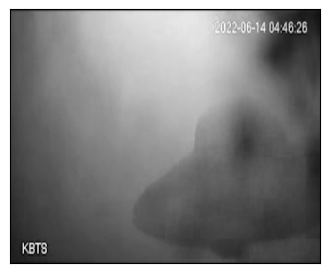

In [9]:
def plot_img(x, im_shape):
    plt.imshow(x.reshape(im_shape), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.gcf().set_size_inches(4, 4)

plot_img(X[211], im_shape=(288, 352))

Hello Mr.Fish! A pleasure to meet you :)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


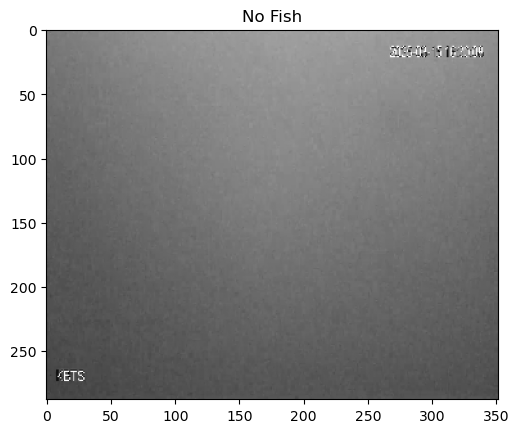

In [16]:
# Get an image, reshape it, and normalize it
img = X[2000].reshape(1, 288, 352, 1) / 255.0

# Make the prediction
prediction = (model.predict(img) > 0.5).astype(int)[0][0]

# Display the image with the prediction
plt.imshow(X[2000].reshape(288, 352), cmap='gray'); plt.title(f"{'Fish' if prediction == 1 else 'No Fish'}"); plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


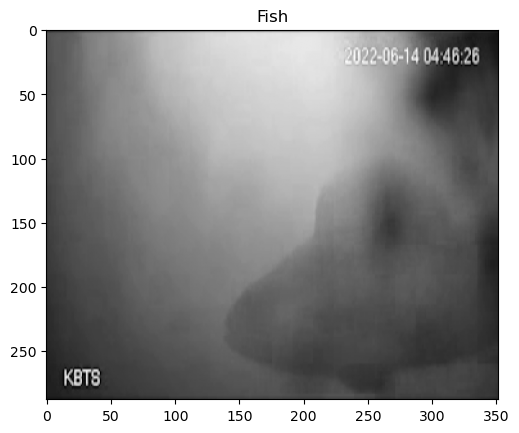

In [17]:
# Get an image, reshape it, and normalize it
img = X[211].reshape(1, 288, 352, 1) / 255.0

# Make the prediction
prediction = (model.predict(img) > 0.5).astype(int)[0][0]

# Display the image with the prediction
plt.imshow(X[211].reshape(288, 352), cmap='gray'); plt.title(f"{'Fish' if prediction == 1 else 'No Fish'}"); plt.show()